In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y - {y_train.shape}")
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y - {y_test.shape}")

# x_train(60k images of 28 ^ * 28 dimention) Pixel values range from 0 to 255.
#y_train y - : digit labels (integers in range 0-9)

Shape of X_train (60000, 28, 28)
Shape of y - (60000,)
Shape of x_test (10000, 28, 28)
Shape of y - (10000,)


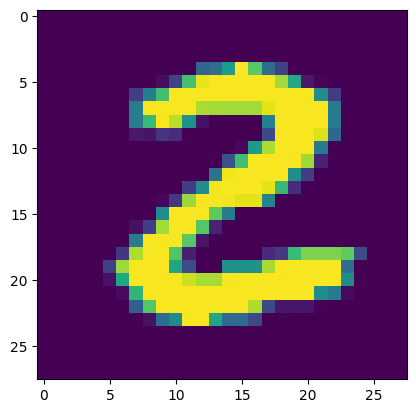

2


In [4]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

In [5]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

#0/255 = 255
#255/255 = 1 maximum value

In [7]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation= 'relu', name='L1'),
    keras.layers.Dense(50, activation='relu', name='L2'),
    keras.layers.Dense(10, activation='softmax', name='L3')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer="sgd", loss=tf.keras.losses. SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
#Training the model
history=model.fit(x_train, y_train,
batch_size=30,
epochs=10,
validation_data=(x_test, y_test),
shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6403 - loss: 1.2261 - val_accuracy: 0.9082 - val_loss: 0.3235
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9081 - loss: 0.3205 - val_accuracy: 0.9234 - val_loss: 0.2584
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9269 - loss: 0.2575 - val_accuracy: 0.9344 - val_loss: 0.2256
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9355 - loss: 0.2210 - val_accuracy: 0.9407 - val_loss: 0.1941
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9445 - loss: 0.1948 - val_accuracy: 0.9465 - val_loss: 0.1804
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9489 - loss: 0.1755 - val_accuracy: 0.9509 - val_loss: 0.1649
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9526 - loss: 0.1617 - val_accuracy: 0.9556 - val_loss: 0.1512
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9571 - loss: 0.1461 -

<Axes: >

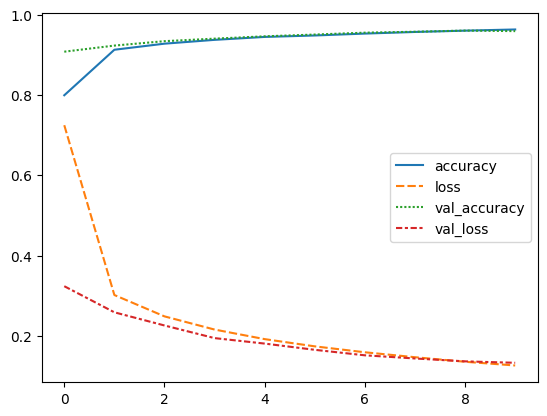

In [14]:
import seaborn as sns
sns.lineplot(model.history.history)

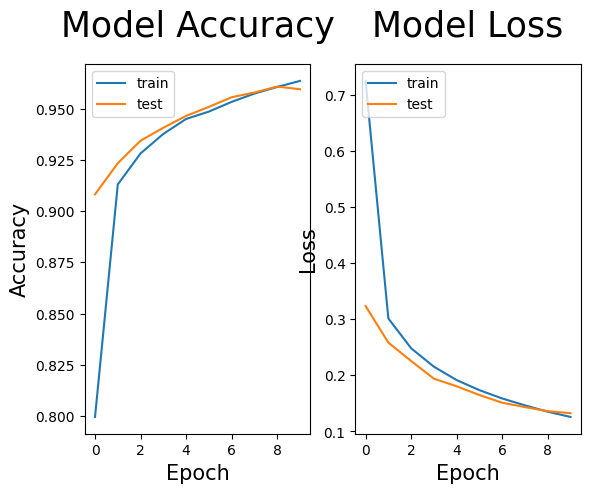

In [16]:
# Plotting the Model Accuracy & Model Loss vs Epochs plt.figure(figsize=[15,8])
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)

plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
#summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9526 - loss: 0.1494


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


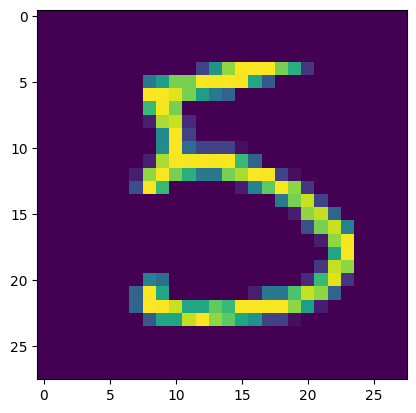

5


In [18]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))